In [16]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

[[ 7.4385406   2.68391907]
 [-6.43881528 10.24713988]
 [-6.89799735 -8.22599115]
 [-9.0517537  -8.99130525]
 [-7.76367433 -5.60570645]]
[1 0 2 2 2]


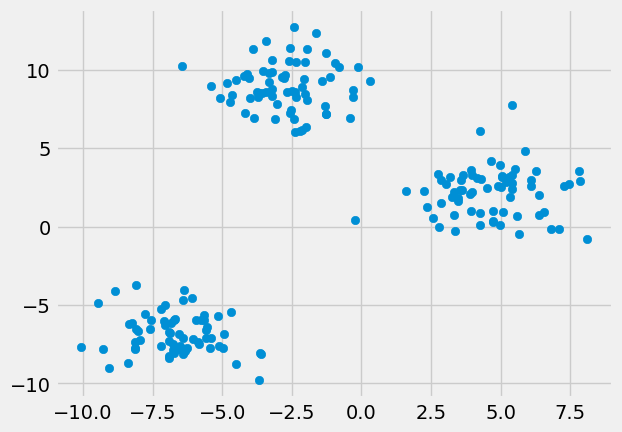

In [17]:
features, true_labels = make_blobs(n_samples=200,centers=3,cluster_std=1.5,random_state=42)

plt.scatter(features[:, 0], features[:, 1], marker="o")

print(features[0:5, :])
print(true_labels[0:5])

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print(scaled_features[0:5, :])

[[ 1.83938303  0.18523866]
 [-0.9944061   1.33029029]
 [-1.08817218 -1.46649291]
 [-1.52797435 -1.58235944]
 [-1.26494548 -1.06978873]]


In [19]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

print("SSE: {sse}".format(sse = kmeans.inertia_))
print("Cluster Centers: {cc}".format(cc = kmeans.cluster_centers_))
print("Labels: {label}".format(label= kmeans.labels_[0:5]))

SSE: 26.48187334999267
Cluster Centers: [[-1.04330478 -1.25622001]
 [-0.23779908  1.13075908]
 [ 1.26553215  0.10671138]]
Labels: [2 1 0 0 0]


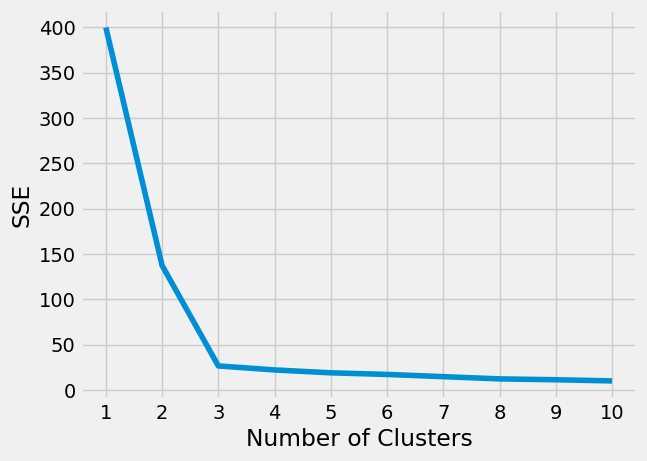

In [20]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300,random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)

3


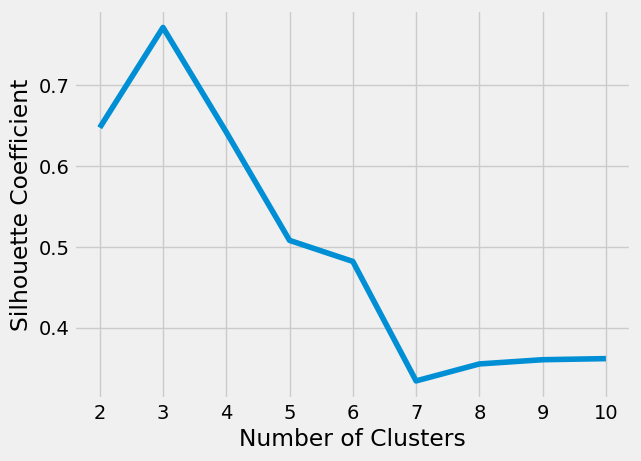

In [22]:
silhouette_coefficients = []
for k in range(2, 11):
   kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300,random_state=42)
   kmeans.fit(scaled_features)
   score = silhouette_score(scaled_features, kmeans.labels_)
   silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [23]:
import pandas as pd

data = pd.read_csv('data.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
data['Gender'].replace('Male' , 1 , inplace=True)
data['Gender'].replace('Female' , 0 , inplace=True)
data.drop('CustomerID' , axis='columns', inplace=True)

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [25]:
mean_gender = data["Gender"].mean()
std_gender = data["Gender"].std()

mean_age = data["Age"].mean()
std_age = data["Age"].std()

mean_income = data["Annual Income (k$)"].mean()
std_income = data["Annual Income (k$)"].std()

mean_score = data["Spending Score (1-100)"].mean()
std_score = data["Spending Score (1-100)"].std()



scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print(scaled_data)

[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [-0.88640526 -1.20926872 -1.66266033  1.00159627]
 [-0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [-0.88640526 -1.13750203 -1.62449091  1.70038436]
 [ 1.12815215  1.80493225 -1.58632148 -1.83237767]
 [-0.88640526 -0.6351352  -1.58632148  0.84631002]
 [ 1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [-0.88640526 -0.27630176 -1.58632148  1.89449216]
 [-0.88640526  1.37433211 -1.54815205 -1.36651894]
 [-0.88640526 -1.06573534 -1.54815205  1.04041783]
 [ 1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [ 1.12815215 -1.20926872 -1.54815205  1.11806095]
 [-0.88640526 -0.27630176 -1.50998262 -0.59008772]
 [ 1.12815215 -1.3528021  -1.50998262  0.61338066]
 [ 1.12815215  0.94373197 -1.43364376 -0.82301709]
 [-0.88640526 -0.27630176 -1.43

In [26]:
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_data)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [27]:
data = data.assign(Label = kmeans.labels_)

data.head(100)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
95,1,24,60,52,0
96,0,47,60,47,1
97,0,27,60,50,0
98,1,48,61,42,3


In [28]:
clusters = kmeans.cluster_centers_
clusters[0:4][:,0] = (clusters[0:4][:,0] * std_gender) + mean_gender
clusters[0:4][:,1] = (clusters[0:4][:,1] * std_age) + mean_age
clusters[0:4][:,2] = (clusters[0:4][:,2]* std_income) + mean_income
clusters[0:4][:,3] = (clusters[0:4][:,3] * std_score) + mean_score
print(clusters)

[[ 3.88760630e-01  2.48724197e+01  3.96142366e+01  6.12313166e+01]
 [-1.10414226e-03  4.72451521e+01  6.11220967e+01  3.57396659e+01]
 [ 4.61592510e-01  3.26768555e+01  8.66036523e+01  8.22083262e+01]
 [ 1.00140527e+00  4.92300643e+01  6.22491261e+01  2.96833379e+01]]
